<a href="https://colab.research.google.com/github/goneyacine/Learning-ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = np.float32(x_train) / 255
x_test = np.float32(x_test) / 255

In [16]:
print(x_train.max(),x_train.min())
print(y_train.max(),y_train.min())
print(x_test.max(),x_test.min())
print(y_test.max(),y_test.min())

1.0 0.0
9 0
1.0 0.0
9 0


In [17]:
class_names = ['airplane','automobile' ,'bird' ,'cat' 'deer' ,'dog' ,'frog', 'horse' ,'ship' ,'truck']

IndexError: ignored

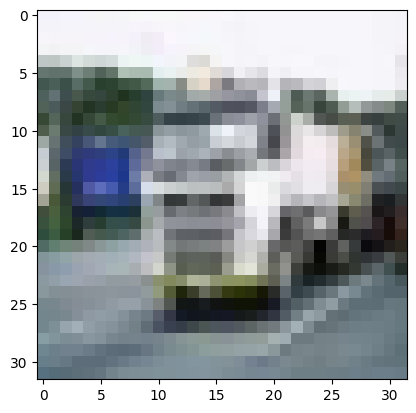

In [18]:
plt.imshow(x_train[1000])
plt.xlabel(class_names[int(y_train[1000])])

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [21]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation=tf.nn.relu))
model.add(keras.layers.Dense(28,activation=tf.nn.relu))
model.add(keras.layers.Dense(10))


In [ ]:
model.summary()

In [26]:
optimizer = keras.optimizers.Adam(0.001)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 0.8484 - accuracy: 0.7034 - val_loss: 0.9580 - val_accuracy: 0.6673
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7900 - accuracy: 0.7233 - val_loss: 0.9053 - val_accuracy: 0.6887
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7425 - accuracy: 0.7411 - val_loss: 0.9547 - val_accuracy: 0.6805
Epoch 4/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6999 - accuracy: 0.7559 - val_loss: 0.8930 - val_accuracy: 0.7004
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.6659 - accuracy: 0.7666 - val_loss: 0.9031 - val_accuracy: 0.6999
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6338 - accuracy: 0.7778 - val_loss: 0.9163 - val_accuracy: 0.6976
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.6029 - accuracy: 0.7867 - val_loss: 0.8923 -

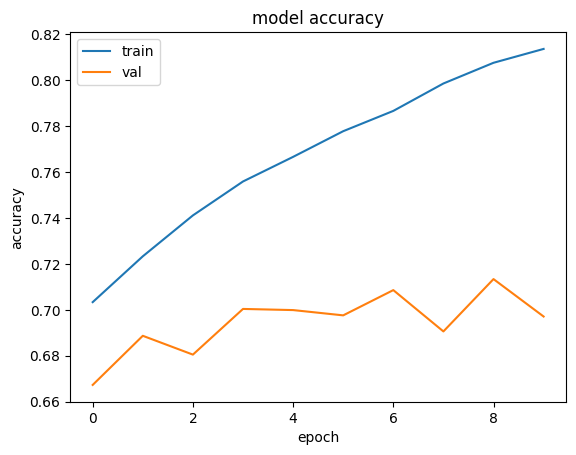

In [27]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [28]:
model.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9614 - accuracy: 0.6971


[0.9614140391349792, 0.6970999836921692]